In [1]:
from uncertainties_pandas import UncertaintyArray, UncertaintyDtype
import pandas as pd
import numpy as np
from uncertainties import ufloat, umath, unumpy

# Object creation

Uncertainties-Pandas provides `UncertaintyArray`, which is used by pandas to store and operate on `uncertainties` objects.
Create an `UncertaintyArray` by passing a list of ufloats.

In [2]:
ufloats = [ufloat(i, abs(i) / 100) for i in [4.0, np.nan, -5.0]]
uarr = UncertaintyArray(ufloats)
uarr

<UncertaintyArray>
[4.0+/-0.04, <NA>, -5.0+/-0.05]
Length: 3, dtype: UncertaintyDtype

The `UncertaintyArray` can be stored in a `Series` or `DataFrame`.

In [3]:
s = pd.Series(uarr)
s

0     4.00+/-0.04
1            <NA>
2    -5.00+/-0.05
dtype: UncertaintyDtype

<div class="alert alert-block alert-danger"> Series and DataFrame both accept a list of ufloats as an input. If no dtype is specified, pandas will store the ufloats as objects, bypassing Uncertainties-Pandas. Notice the object dtype:   </div>

In [4]:
pd.Series(ufloats)

0     4.00+/-0.04
1       nan+/-nan
2    -5.00+/-0.05
dtype: object

An alternative to using `UncertaintyArray` is to specify the dtype

In [5]:
pd.Series(ufloats, dtype="UncertaintyDtype")
pd.Series(ufloats, dtype=UncertaintyDtype())

0     4.00+/-0.04
1            <NA>
2    -5.00+/-0.05
dtype: UncertaintyDtype

# Operations

Let's create a `DataFrame` to show how operations behave.

Columns A1 and A2 use the same objects, while column B uses different objects.

In [6]:
uarr_a = [ufloat(i, abs(i) / 100) for i in range(1, 4)]
uarr_b = [ufloat(i, abs(i) / 100) for i in range(1, 4)]

df = pd.DataFrame({"A1": uarr_a, "A2": uarr_a, "B": uarr_b}, dtype=UncertaintyDtype())
df

,A1,A2,B
0,1.000+/-0.010,1.000+/-0.010,1.000+/-0.010
1,2.000+/-0.020,2.000+/-0.020,2.000+/-0.020
2,3.000+/-0.030,3.000+/-0.030,3.000+/-0.030


Equality checks show the object stored in A1 are the same as A2

In [7]:
df["A1"] == df["A2"]

0    True
1    True
2    True
dtype: bool

which are different objects to those in B

In [8]:
df["A1"] == df["B"]

0    False
1    False
2    False
dtype: bool

Comparative operations:

In [9]:
df["A1"] > 2

0    False
1    False
2     True
Name: A1, dtype: bool

Arithmetic operations:

In [10]:
df["A1"] - df["A1"]

0    0.0+/-0
1    0.0+/-0
2    0.0+/-0
Name: A1, dtype: UncertaintyDtype

In [11]:
df["A1"] - df["B"]

0    0.000+/-0.014
1    0.000+/-0.028
2      0.00+/-0.04
dtype: UncertaintyDtype

In [12]:
df.mean()

A1    2.000+/-0.012
A2    2.000+/-0.012
B     2.000+/-0.012
dtype: UncertaintyDtype

# Other operations:

In [13]:
s = df.stack()
s

0  A1    1.000+/-0.010
   A2    1.000+/-0.010
   B     1.000+/-0.010
1  A1    2.000+/-0.020
   A2    2.000+/-0.020
   B     2.000+/-0.020
2  A1    3.000+/-0.030
   A2    3.000+/-0.030
   B     3.000+/-0.030
dtype: UncertaintyDtype

In [14]:
s.value_counts()

1.000+/-0.010    2
2.000+/-0.020    2
3.000+/-0.030    2
1.000+/-0.010    1
2.000+/-0.020    1
3.000+/-0.030    1
Name: count, dtype: int64

In [15]:
df["C"] = [1, 1, 2]
df.groupby("C")[["A1", "A2"]].sum()

,A1,A2
C,,
1,3.000+/-0.022,3.000+/-0.022
2,3.000+/-0.030,3.000+/-0.030


# Plotting

<Axes: >

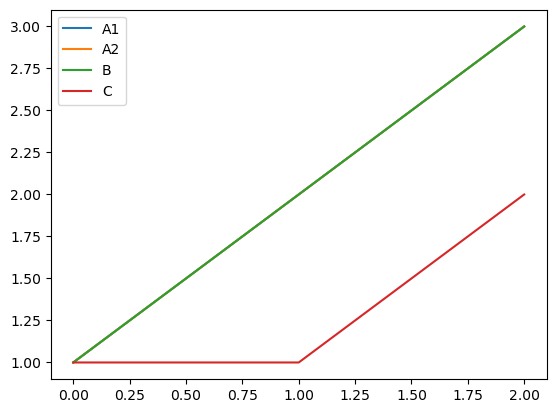

In [16]:
df.plot()